In [4]:
import os
import numpy as np
import pandas as pd
import lightgbm as lgb_model
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer 
SEED=1

/usr/local/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [5]:
data_path='/Users/yezhuoyang/Desktop/ml/p1/handout/train_shuffle.txt'
handout_path='/Users/yezhuoyang/Desktop/ml/p1/handout/test_handout.txt'
output_path='/Users/yezhuoyang/Desktop/ml/p1/handout/submission.csv'
def read(path):
    tag_list=[]
    input_list=[]
    with open(path,'r') as f:
       for line in f.readlines(): 
            tag_list.append(line.split('\t')[0].strip())
            input_list.append(line.split('\t')[1].strip())
    return input_list,tag_list    
def read_output(path):
    input_list=[]
    with open(path,'r') as f:
        for line in f.readlines():
            input_list.append(line.strip())
    return input_list        
def process(input_list,handout_list,tag_list,max_f=20000):
      label_list=[]
      data_list=[]
      #transformer = TfidfTransformer()  
      vectorizer=CountVectorizer(min_df=1,ngram_range=(1,4),token_pattern='\w',max_features=max_f)
      for x in tag_list:
         if x=='0':
                label_list.append(0)
         else:
                label_list.append(1)     
      data_list= vectorizer.fit_transform(input_list+handout_list)
      return data_list[:len(input_list)],data_list[len(input_list):],np.array(label_list)
from sklearn.model_selection import train_test_split
X_handout=read_output(handout_path)
X_origin,y_origin=read(data_path)
X,X_handout,y=process(X_origin,X_handout,y_origin)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.2, random_state=42)    

In [69]:
X_origin

['酸菜鱼不错',
 '轻食素食都是友善的饮食方式',
 '完爆中午吃的农家乐',
 '烤鱼很入味',
 '有种入口即化的感觉',
 '菜品一如既往的好',
 '味道非常好',
 '团购很优惠',
 '咖喱牛腩不错',
 '部分菜偏酸辣口',
 '米饭配的恰到好处',
 '下好的面条一如继往的恰到好处',
 '冰粉味道不错',
 '菌菇汤不错',
 '汤的味道恰到好处',
 '味道一如既往的好',
 '前台服务非常好',
 '黄鱼年糕里面年糕味道还不错',
 '鸭爪还不错',
 '对外经贸大学东门外新开的涮串店',
 '服务态度特别好',
 '味道是很不错的',
 '短发剪的很好',
 '新菜品里有个麻辣鸡肉',
 '主打海鲜都很新鲜',
 '豆浆一如既往很醇香',
 '套餐很优惠',
 '房间里免费的水果',
 '赵云挂面鸭肠还不错',
 '冰中的奶香味道恰到好处',
 '引导文文和蔼可亲',
 '中国最大的火山湖',
 '米饭到嘴才有吃完的感觉啊',
 '装修很别具一格',
 '恰到好处点的饮料是玉米汁和红莓',
 '难能可贵的是海鲜很新鲜',
 '重新装修过',
 '牛肉煎制恰到好处',
 '来到这家新开的侨鑫商场',
 '鸭肠好好吃',
 '冰激凌品种丰富',
 '酱汁恰到好处的拌匀整锅饭',
 '搭配恰到好处的芝士',
 '辣的菜辣的恰到好处',
 '位置在好旺广场里',
 '金针菇烤的火候恰到好处',
 '灯光一直很暗',
 '装修的不错',
 '只能吃到玉米仁',
 '建议在中间划两刀夹着肉松让味道均匀',
 '淋的千岛酱量恰到好处',
 '是一家很正宗的潮汕菜',
 '态度和蔼可亲地安慰了几句',
 '实打实的好材料绣球豆腐',
 '环境和音响设备都好了很多',
 '绿化覆盖率极高',
 '最爱桑葚的',
 '鱼新鲜很多',
 '团购的套餐非常划算',
 '意粉稍微偏硬了',
 '麻婆豆腐很合适',
 '百叶焯的恰到好处',
 '环境非常好',
 '女人婚纱妆多半显老',
 '装修很古色古香',
 '厚切分量足',
 '椰子鸡汤还不错',
 '据说这个品牌是泰国最好吃的冰激凌',
 '前台小哥态度特别好',
 '难得的意式披萨',
 '套餐很实惠',
 '小孩在弋果学习已经两年多的时间了',
 '海鲜量不错',
 '至尊油泼面有丸子和虾加上油泼辣子'

In [45]:
def get_models():
    nb=GaussianNB()
    nb = GaussianNB()#朴素贝叶斯
    svc = SVC(C=0.0176,random_state=SEED,kernel="linear" ,probability=True)#kernel选用线性最好，因为kerenl太复杂容易过拟合，支持向量机
    #sig=SVC(kernel='sigmoid',gamma=0.0255,probability=True)
    lr = LogisticRegression(C=100, random_state=SEED)#逻辑回归
    nn = MLPClassifier((80, 2),solver='lbfgs',alpha=167,early_stopping=False, random_state=SEED)#多层感知器
    gb = GradientBoostingClassifier(n_estimators=100, random_state=SEED)#GDBT
    rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=SEED)#随机森林
    etree=ExtraTreesClassifier(random_state=SEED)#etree
    adaboost=AdaBoostClassifier(random_state=SEED)#adaboost
    dtree=DecisionTreeClassifier(random_state=SEED)#决策树
    #lgb=lgb_model.sklearn.LGBMClassifier(is_unbalance=False,learning_rate=0.04,n_estimators=110,max_bin=400,scale_pos_weight=0.8)#lightGBM，需要安装lightGBM，pip3 install lightGBM
    models={
            'svm':svc,
            'mlp-nn':nn,
            'random forest':rf,
            'gbm':gb,
            'logistic':lr,
            'etree':etree,
            'adaboost':adaboost,
            'dtree':dtree,
    }
    return models

In [46]:
def train_predict(model_list):
    P = np.zeros((y_test.shape[0], len(model_list)))
    P = pd.DataFrame(P)
    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(model_list.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(X_train, y_train)
        P.iloc[:, i] = m.predict(X_test)
        cols.append(name)
        print("done")
    P.columns = cols
    print("ALL model Done.\n")
    return P
def score_models(P, y):
    print("Scoring AUC的值models.")
    for m in P.columns:
        score = roc_auc_score(y, P.loc[:, m])
        print("%-26s: %.3f" % (m, score))
    print("Done.\n")

Fitting models.
svm... done
knn... done
mlp-nn... done
random forest... done
gbm... done
logistic... 

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


done
etree... 

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


done
adaboost... done
dtree... done
ALL model Done.

Scoring AUC的值models.
svm                       : 0.878
knn                       : 0.737
mlp-nn                    : 0.500
random forest             : 0.762
gbm                       : 0.815
logistic                  : 0.854
etree                     : 0.825
adaboost                  : 0.827
dtree                     : 0.839
Done.



NameError: name 'diverging_palette' is not defined

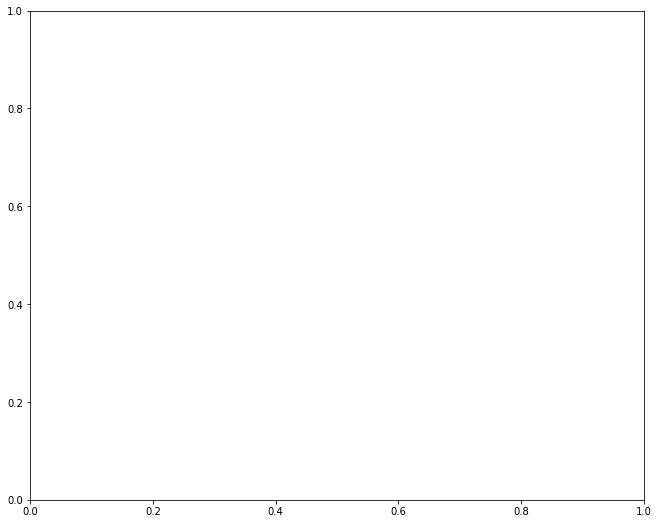

In [37]:
from sklearn.metrics import roc_auc_score
import seaborn
base_learners = get_models()
P = train_predict(base_learners)
score_models(P, y_test)
from mlens.visualization import corrmat
import matplotlib.pyplot as plt 
corrmat(P.corr(), inflate=False)
plt.show()

Scoring AUC的值models.
svm                       : 0.878
knn                       : 0.737
sig                       : 0.884
mlp-nn                    : 0.500
random forest             : 0.762
gbm                       : 0.815
logistic                  : 0.854
etree                     : 0.825
adaboost                  : 0.827
dtree                     : 0.839
Done.



NameError: name 'diverging_palette' is not defined

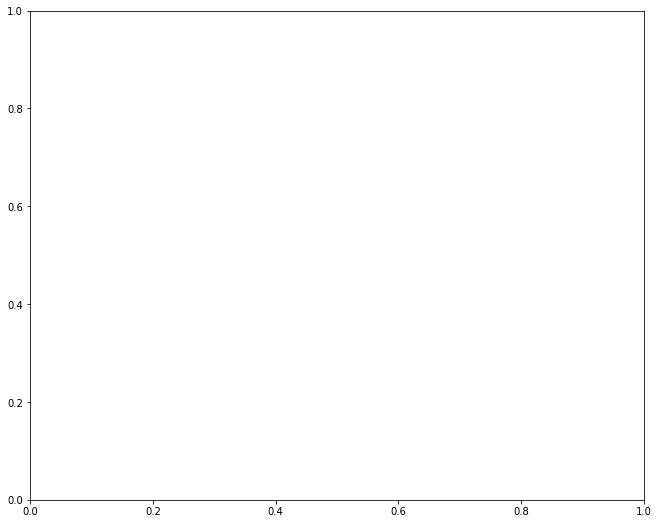

Scoring AUC的值models.
svm                       : 0.878
knn                       : 0.737
mlp-nn                    : 0.500
random forest             : 0.762
gbm                       : 0.815
logistic                  : 0.854
etree                     : 0.825
adaboost                  : 0.827
dtree                     : 0.839
Done.



NameError: name 'diverging_palette' is not defined

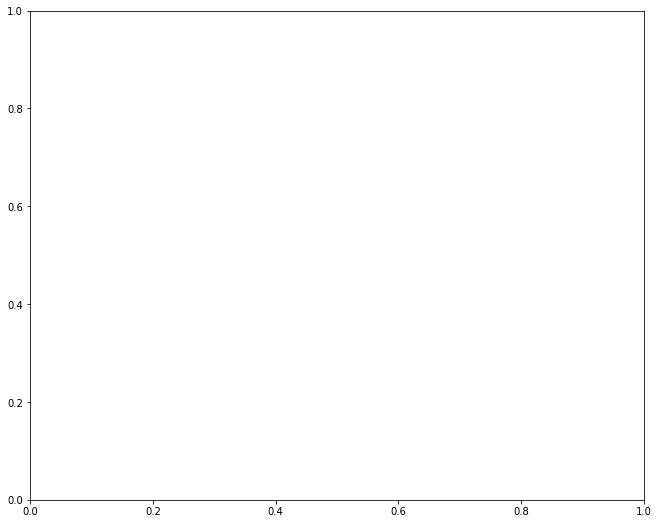

In [40]:
score_models(P, y_test)
from mlens.visualization import corrmat
import matplotlib.pyplot as plt 
corrmat(P.corr(), inflate=False)
plt.show()

In [41]:

meta_learner = GradientBoostingClassifier(
    n_estimators=1000,
    loss="exponential",
    max_features=3,
    max_depth=5,
    subsample=0.8,
    learning_rate=0.05, 
    random_state=SEED
)

In [42]:
meta_learner.fit(P, y_test)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='exponential', max_depth=5,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [43]:
from mlens.ensemble import SuperLearner
#5折集成
sl = SuperLearner(
    folds=5,
    random_state=SEED,
    verbose=2,
    backend="multiprocessing"
)
sl.add(list(base_learners.values()), proba=True) 
sl.add_meta(meta_learner, proba=True)
sl.fit(X_train, y_train)
p_sl = sl.predict_proba(X_test)
#print("\n超级学习器的AUC值: %.3f" % roc_auc_score(y_test, p_sl))


Fitting 2 layers
Processing layer-1             

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

done | 00:04:54
Processing layer-2             done | 00:00:06
Fit complete                        | 00:05:00

Predicting 2 layers
Processing layer-1             done | 00:00:02
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:02


ValueError: bad input shape (3200, 2)

In [44]:
p_sl = sl.predict_proba(X_test)
print("\n超级学习器的AUC值: %.3f" % roc_auc_score(y_test, [q[1] for q in p_sl]))


Predicting 2 layers
Processing layer-1             done | 00:00:02
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:02

超级学习器的AUC值: 0.948


array([[0.05447828, 0.9455217 ],
       [0.99855167, 0.00144832],
       [0.9989974 , 0.00100258],
       ...,
       [0.9985592 , 0.00144083],
       [0.01034328, 0.98965675],
       [0.9911696 , 0.00883045]], dtype=float32)

In [48]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
def plot_roc_curve(ytest, P_base_learners, P_ensemble, labels, ens_label):
    """Plot the roc curve for base learners and ensemble."""
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], 'k--')
    cm = [plt.cm.rainbow(i)
      for i in np.linspace(0, 1.0, P_base_learners.shape[1] + 1)]
    for i in range(P_base_learners.shape[1]):
        p = P_base_learners[:, i]
        fpr, tpr, _ = roc_curve(ytest, p)
        plt.plot(fpr, tpr, label=labels[i], c=cm[i + 1])
    fpr, tpr, _ = roc_curve(ytest, P_ensemble)
    plt.plot(fpr, tpr, label=ens_label, c=cm[0])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right",frameon=False)
    plt.show()

In [ ]:
A={'a':2,'z':3}
A.values()

ValueError: bad input shape (3200, 2)

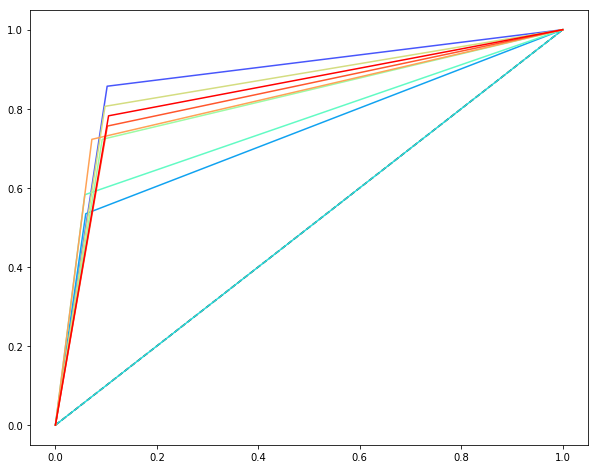

In [49]:
plot_roc_curve(y_test, P.values, p_sl, list(P.columns), "Super Learner")

In [51]:
sl

SuperLearner(array_check=None, backend=None, folds=5,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=235, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=5, raise_on_exc...rer=None)],
   n_jobs=-1, name='group-9', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=1, sample_size=20, scorer=None, shuffle=False,
       verbose=2)


Predicting 2 layers


ValueError: Number of splits 5 is greater than the number of samples: 1.

In [65]:
X_handout[0]

<1x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [68]:
import csv
def write(y_pred,path):
    i=0
    f=open('path','wb',newline='')
    csv_write=csv.writer(f,dialect='excel')
    csv_write.writerow(['id','pred'])
    for x in y_pred:
        csv_write.writerow([i,x])
        i=i+1

In [59]:
sl

SuperLearner(array_check=None, backend=None, folds=5,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=235, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=5, raise_on_exc...rer=None)],
   n_jobs=-1, name='group-9', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=1, sample_size=20, scorer=None, shuffle=False,
       verbose=2)